In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
%matplotlib inline

In [2]:
path ="600092_data.csv" 

# Data exploration phase

During this period, a brief overview of what is contained in our legacy data is observed and weighed in regard to its respective attribute

In [3]:
df = pd.read_csv(path, encoding = 'utf-8')

In [4]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


## Expected data types

Data attributes for each column are displayed below:

* Random column - Real numbers(all unique)
* ID column - Real numbers(all unique but duplicates allowed)
* Indication - string/object type (4 nominal values)"ASx, A-F,CVA,TIA"
* Diabetes - string/object type(2 nominal values)"yes, no"
* IHD - string/object type(2 nominal values)"yes, no"
* Hypertension - string/object type(2 nominal values)"yes, no"
* Arrhythmia - string/object type(2 nominal values)"yes, no"
* History - string/object type(2 nominal values)"yes, no"
* IPSI - float type(0 - 100)
* Contra - float type(0 - 100)
* label - string/object type(2 nominal values)"risk,no risk"

## Data Quality Insights

### Null values

Data is checked for missing values and mismatches depending on its respected attribute.
One of the assumptions made during this stage is that there arent supposed to be any null values in the legacy data. Missing values in the database will be regarded as unclean data and will need to be cleaned.

In [5]:
var = df['label']
var.isnull().sum()

3

In [6]:
var = df['Hypertension']
var.isnull().sum()

3

In [7]:
var = df['IPSI']
var.isnull().sum()

4

In [8]:
var = df['Contra']
var.isnull().sum()

0

In [9]:
var = df['Arrhythmia']
var.isnull().sum()

0

In [10]:
var = df['Id']
var.isnull().sum()

0

In [11]:
var = df['Random']
var.isnull().sum()

0

In [12]:
var = df['Indication']
var.isnull().sum()

3

In [13]:
var = df['Diabetes']
var.isnull().sum()

2

In [14]:
var = df['IHD']
var.isnull().sum()

0

In [15]:
var = df['History']
var.isnull().sum()

2

#### Data evaluation

There were prescence of null values in the IPSI, Contra, Indication, Hypertension, Diabetes and History indicating unclean data

### Data type mismatch

In [16]:
df['IPSI'].describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [17]:
df['History'].describe()

count     1518
unique       2
top         no
freq      1494
Name: History, dtype: object

In [18]:
df['Hypertension'].describe()

count     1517
unique       2
top         no
freq       784
Name: Hypertension, dtype: object

In [19]:
df['Indication'].describe()

count     1517
unique       5
top        A-F
freq       493
Name: Indication, dtype: object

In [20]:
df['Id'].describe()

count      1520.000000
mean     188365.022368
std       64355.870242
min       78261.000000
25%      137130.750000
50%      191344.500000
75%      244559.500000
max      295978.000000
Name: Id, dtype: float64

In [21]:
df['Diabetes'].describe()

count     1518
unique       2
top         no
freq      1441
Name: Diabetes, dtype: object

In [22]:
df['Arrhythmia'].describe()

count     1520
unique       2
top         no
freq      1190
Name: Arrhythmia, dtype: object

In [23]:
df['label'].describe()

count       1517
unique         3
top       NoRisk
freq        1008
Name: label, dtype: object

In [24]:
df['Contra'].describe()

count     1520
unique      41
top        100
freq       244
Name: Contra, dtype: object

In [25]:
df['Random'].describe()

count    1520.000000
mean        0.509545
std         0.284006
min         0.000295
25%         0.268531
50%         0.517616
75%         0.754724
max         0.999448
Name: Random, dtype: float64

#### Data evaluation

As per the data displayed above, there is a data mismatch in the contra attribute. This is because the expected data type was to be a float but it returned an object data type. The other attributes match their respective data type correctly

### Data description mismatch

In [26]:
f =  df.duplicated(subset='Random', keep=False)
t = True

for item in f:
    if item == t:
        print("yes")
        break


yes


The code above shows that there is a presence of duplicate values in the random column. This does not match with the random attribute description

In [27]:
df['Indication'].describe()

count     1517
unique       5
top        A-F
freq       493
Name: Indication, dtype: object

Code above shows an extra nominal value in the indication column. This is not expected as this goes against the data description for indication as only 4 nominal values are expected

# Data preparation phase

During this stage data is cleaned so that it can be used in a model to predict the mortality of a patient

In [28]:
f =  df.duplicated(subset='Random', keep=False)
count = -1
count3 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        ##print(x, count)
        List.append(count)
        count3 = count3 + 1

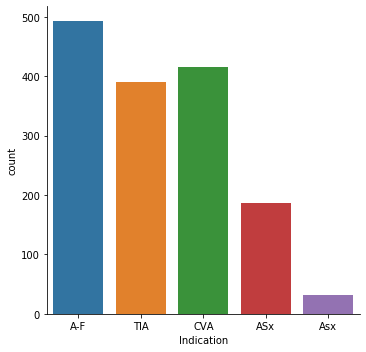

In [29]:
sns.catplot('Indication', data = df, kind='count' )

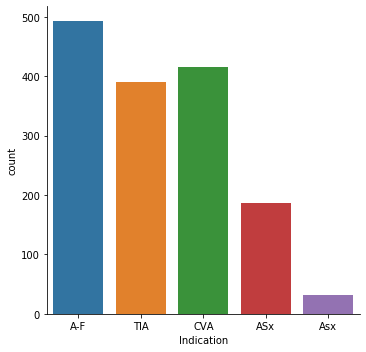

In [30]:
sns.catplot('Indication', data = df, kind='count')

# DATA NEEDS CLEANING AT ASX

In [31]:
df['Indication'] = df['Indication'].replace(['Asx'], 'ASx')

In [32]:
for index, row in df.iterrows(): 
     if ((row["Indication"])== "Asx"):
       print(row["Indication"])

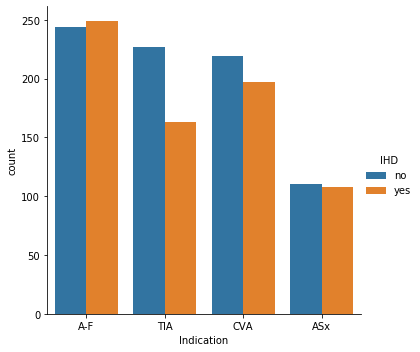

In [33]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

# DID MY FIRSTCLEANING XD

In [34]:
df['Indication'].isnull().sum()

3

In [35]:
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [36]:
df1 = df[df.isna().any(axis=1)]
print (df1)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
201   0.388790  240232        CVA      yes   no          NaN        yes   
337   0.617072  260770        CVA       no  yes           no         no   
442   0.648122  261060        NaN       no  yes          yes         no   
447   0.681744  224257        CVA      NaN  yes          yes        yes   
514   0.392130  210861        A-F      NaN   no          yes         no   
590   0.707950  289096        A-F       no   no          NaN         no   
620   0.283872  227779        A-F       no   no           no         no   
752   0.243518  146415        CVA       no  yes          yes        yes   
784   0.243645  196483        CVA       no   no          yes        yes   
812   0.756938  190671        CVA       no  yes          yes         no   
822   0.211760  205845        NaN       no  yes           no         no   
845   0.920096  104176        CVA       no   no           no         no   
916   0.004501  281679   

##Filling nan in ipsi


In [37]:
##check for duplicate vals
for x in  df.duplicated(subset='Random', keep=False):
    if x == 'True':
        print(x)

In [38]:
f =  df.duplicated(subset='Random', keep=False)
type(f)

pandas.core.series.Series

In [39]:
print(f)

0        True
1        True
2        True
3       False
4       False
        ...  
1515     True
1516    False
1517    False
1518    False
1519    False
Length: 1520, dtype: bool


In [40]:
count = -1
count3 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        ##print(x, count)
        List.append(count)
        count3 = count3 + 1

In [41]:
List2 = []
for index, row in df.iterrows():
    if index in List:
        List2.append(row)

In [42]:
List2

[Random          0.602437
 Id                218242
 Indication           A-F
 Diabetes              no
 IHD                   no
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  78
 Contra               20 
 label             NoRisk
 Name: 0, dtype: object, Random          0.602437
 Id                159284
 Indication           TIA
 Diabetes              no
 IHD                   no
 Hypertension          no
 Arrhythmia            no
 History               no
 IPSI                  70
 Contra               60 
 label             NoRisk
 Name: 1, dtype: object, Random          0.602437
 Id                106066
 Indication           A-F
 Diabetes              no
 IHD                  yes
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  95
 Contra                40
 label               Risk
 Name: 2, dtype: object, Random          0.678157
 Id                256128
 Indication       

In [43]:
List

[0,
 1,
 2,
 8,
 10,
 13,
 15,
 16,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 84,
 86,
 88,
 90,
 92,
 101,
 104,
 106,
 108,
 110,
 112,
 114,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 176,
 178,
 180,
 182,
 184,
 188,
 189,
 190,
 192,
 194,
 196,
 198,
 199,
 212,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 228,
 230,
 231,
 232,
 233,
 237,
 244,
 245,
 247,
 248,
 249,
 254,
 255,
 256,
 258,
 260,
 261,
 262,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 300,
 302,
 304,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 325,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 344,
 346,
 350,
 356,
 358,
 360,
 362,
 364,
 366,
 368,
 369,
 370,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 386,
 387,
 388,


In [44]:
import random
List3 = []
for item in List2:
    randomNumber = random.uniform(0, 1)
    if randomNumber != df['Random'].count():
        List3.append(randomNumber)
        item['Random'] = randomNumber
        print(item)

Random          0.759493
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
Random          0.71091
Id               159284
Indication          TIA
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 70
Contra              60 
label            NoRisk
Name: 1, dtype: object
Random          0.944481
Id                106066
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  95
Contra                40
label               Risk
Name: 2, dtype: object
Random          0.0121483
Id                 256128
Indication            TIA
Diabetes               no
IHD          

Random          0.280866
Id                 97160
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  68
Contra               40 
label             NoRisk
Name: 614, dtype: object
Random          0.896544
Id                179887
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               15 
label             NoRisk
Name: 616, dtype: object
Random          0.969279
Id                272112
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  68
Contra               20 
label             NoRisk
Name: 617, dtype: object
Random          0.309044
Id                115285
Indication           A-F
Diabetes              no


Name: 1340, dtype: object
Random          0.227979
Id                203242
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label               Risk
Name: 1344, dtype: object
Random          0.913008
Id                151065
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               10 
label             NoRisk
Name: 1351, dtype: object
Random          0.556787
Id                202040
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label               Risk
Name: 1352, dtype: object
Random          0.886029
Id                287920
Indication           

In [45]:
##refer each random number to index
##i wanna loop through each index(list) and random number(list3) at the same time
counter1 = 0
for item in List:
    x = df.loc[item,:]
    x.values[0]=List3[counter1]
    df.loc[item,:] = x
    counter1 = counter1 + 1
    print(x)

Random          0.759493
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
Random          0.71091
Id               159284
Indication          TIA
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 70
Contra              60 
label            NoRisk
Name: 1, dtype: object
Random          0.944481
Id                106066
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  95
Contra                40
label               Risk
Name: 2, dtype: object
Random          0.0121483
Id                 256128
Indication            TIA
Diabetes               no
IHD          

Name: 59, dtype: object
Random          0.905074
Id                232028
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 60, dtype: object
Random          0.515268
Id                 97462
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  68
Contra               20 
label             NoRisk
Name: 61, dtype: object
Random          0.697831
Id                101697
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               25 
label             NoRisk
Name: 62, dtype: object
Random          0.524429
Id                 90643
Indication           A-F
Diab

Name: 160, dtype: object
Random          0.248747
Id                137197
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 162, dtype: object
Random          0.956135
Id                153309
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  85
Contra               20 
label             NoRisk
Name: 164, dtype: object
Random          0.917213
Id                295609
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  90
Contra               90 
label             NoRisk
Name: 166, dtype: object
Random          0.730484
Id                103404
Indication           A-F


Name: 255, dtype: object
Random          0.333923
Id                196788
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               20 
label             NoRisk
Name: 256, dtype: object
Random          0.403759
Id                290877
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               15 
label             NoRisk
Name: 258, dtype: object
Random          0.313589
Id                171463
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               50 
label             NoRisk
Name: 260, dtype: object
Random          0.907092
Id                175170
Indication           TIA


Name: 358, dtype: object
Random          0.353974
Id                260070
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               25 
label             NoRisk
Name: 360, dtype: object
Random          0.151664
Id                207417
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  85
Contra               50 
label             NoRisk
Name: 362, dtype: object
Random          0.155472
Id                138794
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 364, dtype: object
Random          0.0470125
Id                  92719
Indication            C

Name: 421, dtype: object
Random          0.771687
Id                285649
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  77
Contra               20 
label             NoRisk
Name: 422, dtype: object
Random          0.860405
Id                 89080
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  73
Contra               80 
label             NoRisk
Name: 424, dtype: object
Random          0.186944
Id                150277
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  75
Contra                50
label               Risk
Name: 425, dtype: object
Random          0.844287
Id                182912
Indication           A-F


Name: 538, dtype: object
Random          0.980416
Id                 79653
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  85
Contra               75 
label             NoRisk
Name: 540, dtype: object
Random          0.482229
Id                272206
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra              100 
label             NoRisk
Name: 546, dtype: object
Random          0.428548
Id                292632
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               70 
label             NoRisk
Name: 550, dtype: object
Random          0.341929
Id                199246
Indication           ASx


Name: 630, dtype: object
Random          0.952527
Id                173608
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  90
Contra               65 
label             NoRisk
Name: 631, dtype: object
Random          0.846217
Id                264150
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               30 
label             NoRisk
Name: 634, dtype: object
Random          0.92121
Id               202165
Indication          TIA
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 60
Contra              60 
label            NoRisk
Name: 638, dtype: object
Random          0.383481
Id                282658
Indication           A-F
Diabetes   

Name: 726, dtype: object
Random          0.822088
Id                184208
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  95
Contra                40
label               Risk
Name: 728, dtype: object
Random          0.742021
Id                 79594
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               50 
label             NoRisk
Name: 730, dtype: object
Random          0.59083
Id               277148
Indication          ASx
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 90
Contra              100
label              Risk
Name: 732, dtype: object
Random          0.0132639
Id                  97010
Indication            A-F
Diabetes

Random          0.0981339
Id                 190671
Indication            CVA
Diabetes               no
IHD                   yes
Hypertension          yes
Arrhythmia             no
History                no
IPSI                   76
Contra                 50
label                 NaN
Name: 812, dtype: object
Random          0.142137
Id                 91108
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               60 
label             NoRisk
Name: 814, dtype: object
Random          0.867859
Id                 79854
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               85 
label             NoRisk
Name: 816, dtype: object
Random          0.0891027
Id                 279759
Indication            TIA
Diabetes   

Name: 926, dtype: object
Random          0.307565
Id                260690
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               20 
label             NoRisk
Name: 928, dtype: object
Random          0.402445
Id                258724
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  90
Contra                80
label               Risk
Name: 929, dtype: object
Random          0.618846
Id                215064
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra               30 
label             NoRisk
Name: 930, dtype: object
Random          0.331375
Id                215030
Indication           CVA


Name: 1059, dtype: object
Random          0.265153
Id                154051
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  90
Contra               90 
label             NoRisk
Name: 1060, dtype: object
Random          0.843119
Id                163118
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  50
Contra               40 
label             NoRisk
Name: 1062, dtype: object
Random          0.450241
Id                 83371
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  60
Contra               100
label               Risk
Name: 1063, dtype: object
Random          0.447349
Id                251228
Indication           

Name: 1130, dtype: object
Random          0.787027
Id                 87621
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  73
Contra               35 
label             NoRisk
Name: 1132, dtype: object
Random          0.534985
Id                 98556
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  73
Contra               50 
label             NoRisk
Name: 1134, dtype: object
Random          0.676465
Id                114150
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  73
Contra               40 
label             NoRisk
Name: 1135, dtype: object
Random          0.366912
Id                251737
Indication           

Name: 1250, dtype: object
Random          0.783683
Id                189796
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  85
Contra               50 
label             NoRisk
Name: 1251, dtype: object
Random          0.367292
Id                275834
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 1254, dtype: object
Random          0.697366
Id                293692
Indication           ASx
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  78
Contra               35 
label             NoRisk
Name: 1257, dtype: object
Random          0.77142
Id               126002
Indication          ASx

Name: 1392, dtype: object
Random          0.232715
Id                290821
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  72
Contra               73 
label             NoRisk
Name: 1394, dtype: object
Random          0.00993373
Id                  141546
Indication             TIA
Diabetes                no
IHD                     no
Hypertension           yes
Arrhythmia              no
History                 no
IPSI                    75
Contra                 30 
label               NoRisk
Name: 1398, dtype: object
Random          0.00692168
Id                  196315
Indication             A-F
Diabetes                no
IHD                    yes
Hypertension            no
Arrhythmia              no
History                 no
IPSI                    70
Contra                 40 
label               NoRisk
Name: 1399, dtype: object
Random          0.717608
Id

In [46]:
 y = df.loc[63,:]

In [47]:
y

Random          0.53363
Id               210968
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 75
Contra              30 
label            NoRisk
Name: 63, dtype: object

In [48]:
y.values[0] = 1

In [49]:
y.values[0]

1

In [50]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.759493,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.710910,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.944481,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.552375,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [51]:
df.loc[8,:]

Random          0.0121483
Id                 256128
Indication            TIA
Diabetes               no
IHD                    no
Hypertension          yes
Arrhythmia             no
History                no
IPSI                   81
Contra                20 
label              NoRisk
Name: 8, dtype: object

In [52]:
df.loc[10,:]

Random          0.0849957
Id                 174588
Indication            CVA
Diabetes               no
IHD                   yes
Hypertension          yes
Arrhythmia            yes
History                no
IPSI                   75
Contra                 50
label                Risk
Name: 10, dtype: object

In [53]:
List

[0,
 1,
 2,
 8,
 10,
 13,
 15,
 16,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 84,
 86,
 88,
 90,
 92,
 101,
 104,
 106,
 108,
 110,
 112,
 114,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 176,
 178,
 180,
 182,
 184,
 188,
 189,
 190,
 192,
 194,
 196,
 198,
 199,
 212,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 228,
 230,
 231,
 232,
 233,
 237,
 244,
 245,
 247,
 248,
 249,
 254,
 255,
 256,
 258,
 260,
 261,
 262,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 300,
 302,
 304,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 325,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 344,
 346,
 350,
 356,
 358,
 360,
 362,
 364,
 366,
 368,
 369,
 370,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 386,
 387,
 388,


In [54]:
f =  df.duplicated(subset='Random', keep=False)
count = -1
count2 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        count2 = count2 + 1
        print(x, count)
        List.append(count)

In [55]:
count2

0

In [56]:
count3

571

In [57]:
diabetes  = df['Diabetes']

In [58]:
diabetes

0       no
1       no
2       no
3       no
4       no
        ..
1515    no
1516    no
1517    no
1518    no
1519    no
Name: Diabetes, Length: 1520, dtype: object

In [59]:
j = diabetes.notnull()

In [60]:

count = -1
count2 = 0
List = []
t = False
for x in j:
    count= count + 1
    if(x==t):
        count2 = count2 + 1
        List.append(count)
        

# transform ipsi and contra into nominal values

In [61]:
contra = df['Contra']

In [62]:
contra

0       20 
1       60 
2        40
3        85
4       20 
       ... 
1515    60 
1516     75
1517    20 
1518    45 
1519    20 
Name: Contra, Length: 1520, dtype: object

In [63]:
ipsi = df['IPSI']

In [64]:
type (contra)

pandas.core.series.Series

In [65]:
##transforming contras to floats
counter1 = 0
for item in contra:
    x = df.loc[counter1,:]
    if(x.values[9]== " "):
        x.values[9] = "0.0"
    
    x.values[9]=float(x.values[9])
    df.loc[counter1,:] = x
    counter1 = counter1 + 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbcea51308>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbcea51f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbcea4cc08>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbcea57c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbcea57dc8>],
 'means': []}

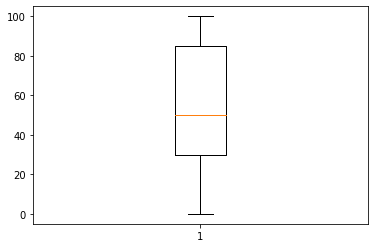

In [66]:
plt.boxplot(df.Contra.fillna(0))

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbceab3448>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbceab3f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbceaadc08>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbceabaa08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbceabaf48>],
 'means': []}

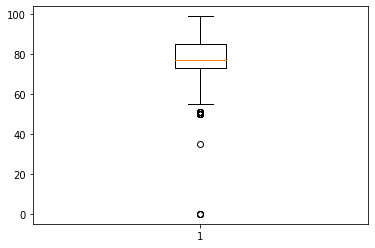

In [67]:
plt.boxplot(df.IPSI.fillna(0))

# RANGE FOR IPSI AND CONTRA FOR ASSOCIATION

In [68]:
##llmao i dont need a boxplt. do ipsi.describe
ipsi.describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [69]:
df['Contra'].describe()

count    1520.000000
mean       56.790789
std        29.561904
min         0.000000
25%        30.000000
50%        50.000000
75%        85.000000
max       100.000000
Name: Contra, dtype: float64

In [70]:
##as per data description
ipsi_rng = []
COUNT = 0
for item in ipsi:
    if 0<= item<=73:
        x = str("Low")
        ipsi[COUNT] = x
    elif 74<= item<=84:
        x = str("Medium")
        ipsi[COUNT] = x
    elif item>=85:
        x = str("High")
        ipsi[COUNT] = x
    COUNT = COUNT + 1

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\scowt\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [71]:
df['IPSI'] = ipsi

In [72]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.759493,218242,A-F,no,no,yes,no,no,Medium,20,NoRisk
1,0.710910,159284,TIA,no,no,no,no,no,Low,60,NoRisk
2,0.944481,106066,A-F,no,yes,yes,no,no,High,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,High,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,Low,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.552375,93406,A-F,no,yes,no,no,no,Medium,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,High,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,Medium,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,Low,45,NoRisk


In [73]:
contra = df['Contra']
COUNT = 0
for item in contra:
    if 0<= item<=49:
        x = str("Low Contra")
        contra[COUNT] = x
    elif 50<= item<=80:
        x = str("Medium Contra")
        contra[COUNT] = x
    elif item>=81:
        x = str("High Contra")
        contra[COUNT] = x
    COUNT = COUNT + 1

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [74]:
df['Contra']= contra

In [75]:
arr = df['Arrhythmia']
hypertension = df['Hypertension']
ihd = df['IHD']
hist = df['History']

In [76]:
c = 0
for item in arr:
    if item == "no":
        arr[c] = "no arrhymia"
    elif item == "yes":
        arr[c] = "yes arrhymia"
    c = c + 1  
    
c = 0
for item in hypertension:
    if item == "no":
        hypertension[c] = "no hypertension"
    elif item == "yes":
        hypertension[c] = "yes hypertension"
    c = c + 1 
    
c = 0
for item in ihd:
    if item == "no":
        ihd[c] = "no ihd"
    elif item == "yes":
        ihd[c] = "yes ihd"
    c = c + 1 
    
c = 0
for item in hist:
    if item == "no":
        hist[c] = "no history"
    elif item == "yes":
        hist[c] = "yes history"
    c = c + 1 
    


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launch

In [77]:
df['Arrhythmia'] = arr
df['IHD'] = ihd
df['Hypertension'] = hypertension
df['History'] = hist

In [78]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.759493,218242,A-F,no,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1,0.710910,159284,TIA,no,no ihd,no hypertension,no arrhymia,no history,Low,Medium Contra,NoRisk
2,0.944481,106066,A-F,no,yes ihd,yes hypertension,no arrhymia,no history,High,Low Contra,Risk
3,0.128157,229592,TIA,no,no ihd,yes hypertension,no arrhymia,no history,High,High Contra,Risk
4,0.676862,245829,CVA,no,no ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.552375,93406,A-F,no,yes ihd,no hypertension,no arrhymia,no history,Medium,Medium Contra,NoRisk
1516,0.253504,121814,A-F,no,no ihd,yes hypertension,yes arrhymia,no history,High,Medium Contra,Risk
1517,0.620373,101754,TIA,no,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1518,0.639342,263836,A-F,no,yes ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk


# Now for association. values to consider are basically all nominal values which have a NaN

In [79]:
##84 combinations
##20!/(8!(20-8)!) = 125970 combinations


In [80]:

ass= pd.DataFrame(ihd)
ass['contra'] = contra
ass['History'] = hist
ass['Hypertension'] = hypertension
ass['ipsi'] = ipsi
ass['indication'] = df['Indication']
ass['diabetes'] = df['Diabetes']
ass['arrhymia'] = df['Arrhythmia']

In [81]:
ass

,IHD,contra,History,Hypertension,ipsi,indication,diabetes,arrhymia
0,no ihd,Low Contra,no history,yes hypertension,Medium,A-F,no,no arrhymia
1,no ihd,Medium Contra,no history,no hypertension,Low,TIA,no,no arrhymia
2,yes ihd,Low Contra,no history,yes hypertension,High,A-F,no,no arrhymia
3,no ihd,High Contra,no history,yes hypertension,High,TIA,no,no arrhymia
4,no ihd,Low Contra,no history,no hypertension,Low,CVA,no,no arrhymia
...,...,...,...,...,...,...,...,...
1515,yes ihd,Medium Contra,no history,no hypertension,Medium,A-F,no,no arrhymia
1516,no ihd,Medium Contra,no history,yes hypertension,High,A-F,no,yes arrhymia
1517,no ihd,Low Contra,no history,yes hypertension,Medium,TIA,no,no arrhymia
1518,yes ihd,Low Contra,no history,no hypertension,Low,A-F,no,no arrhymia


In [82]:
ass_list = ass.values.tolist()

In [83]:
ass_list

[['no ihd',
  'Low Contra',
  'no history',
  'yes hypertension',
  'Medium',
  'A-F',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Medium Contra',
  'no history',
  'no hypertension',
  'Low',
  'TIA',
  'no',
  'no arrhymia'],
 ['yes ihd',
  'Low Contra',
  'no history',
  'yes hypertension',
  'High',
  'A-F',
  'no',
  'no arrhymia'],
 ['no ihd',
  'High Contra',
  'no history',
  'yes hypertension',
  'High',
  'TIA',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Low Contra',
  'no history',
  'no hypertension',
  'Low',
  'CVA',
  'no',
  'no arrhymia'],
 ['no ihd',
  'High Contra',
  'no history',
  'no hypertension',
  'High',
  'A-F',
  'no',
  'yes arrhymia'],
 ['yes ihd',
  'High Contra',
  'no history',
  'yes hypertension',
  'High',
  'A-F',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Medium Contra',
  'no history',
  'no hypertension',
  'Medium',
  'CVA',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Low Contra',
  'no history',
  'yes hypertension',
  'Medium',
  'TIA',
  'no',
  'no a

In [84]:
records = []
for record in ass_list:
    new_item = pd.Series(record).dropna().values.tolist()
    records.append(new_item)
    print(new_item)

['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'Medium Contra', 'no his

['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'ASx', 'no', 'yes arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Low', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'High', 'ASx', 'yes', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'High', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no his

['no ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'ASx', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'High', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'A-F', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'A-F', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'Medium Contra', 'no h

['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'ASx', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'TIA', 'yes', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'Medium', 'ASx', 'no', 'yes arrhymia']
['yes ihd', 'Low Contra', '

['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'ASx', 'no', 'yes arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'High', 'ASx', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['yes ihd', 'High Contra', 'no histor

In [85]:

asso_rules = list( apriori(records, min_support = 0.004, min_confidence = 0.2,min_lift = 4,min_length = 5))

In [86]:
print(f"No of rules: {len(asso_rules)}\n")
for rule in asso_rules:
    print(rule)

No of rules: 278

RelationRecord(items=frozenset({'Medium', 'yes', 'ASx'}), support=0.006578947368421052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Medium', 'yes'}), items_add=frozenset({'ASx'}), confidence=0.6666666666666666, lift=4.648318042813456)])
RelationRecord(items=frozenset({'TIA', 'yes', 'High'}), support=0.0125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TIA', 'High'}), items_add=frozenset({'yes'}), confidence=0.3015873015873016, lift=5.953411667697383)])
RelationRecord(items=frozenset({'A-F', 'yes', 'High', 'yes hypertension'}), support=0.011842105263157895, ordered_statistics=[OrderedStatistic(items_base=frozenset({'A-F', 'High', 'yes hypertension'}), items_add=frozenset({'yes'}), confidence=0.21686746987951808, lift=4.2810201846346425)])
RelationRecord(items=frozenset({'High Contra', 'A-F', 'yes', 'yes arrhymia'}), support=0.009868421052631578, ordered_statistics=[OrderedStatistic(items_base=frozenset({'High Contra', 'A-F', 'yes'}), item

In [87]:
asso_rules[0]

RelationRecord(items=frozenset({'Medium', 'yes', 'ASx'}), support=0.006578947368421052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Medium', 'yes'}), items_add=frozenset({'ASx'}), confidence=0.6666666666666666, lift=4.648318042813456)])

In [88]:

def print_rules(asso_rules):
    for r in asso_rules:
        print(len(r.ordered_statistics))
     
        for outcome in list (r.ordered_statistics):
            x = str(outcome.items_add)
            if(x =="frozenset({'yes'})"):
                print("Rule: "+", ".join(outcome.items_base ), end = " ")
                print("->" + ", ".join(outcome.items_add))
                print("Support: " + str( r. support))
                print("Confidence: "+ str(outcome.confidence))
                print("Lift: "+ str(outcome.lift))
                print(x)
                print("====================================")
               

# diabetes null val

In [89]:
df2 = pd.read_csv(path, encoding = 'utf-8')
db2 = df2['Diabetes']
x = db2.isnull().sum()
y = db2.isnull()

c = 0
t = True
value = []
for item in y:
    if(item == t):
      value.append(c)
    c = c + 1

print(value)
db_null = df.loc[447,:]
db_null1 = df.loc[514,:]

db_null1

[447, 514]


Random                   0.39213
Id                        210861
Indication                   A-F
Diabetes                     NaN
IHD                       no ihd
Hypertension    yes hypertension
Arrhythmia           no arrhymia
History               no history
IPSI                      Medium
Contra                Low Contra
label                     NoRisk
Name: 514, dtype: object

In [90]:
db_null
##using 

Random                 0.0940666
Id                        224257
Indication                   CVA
Diabetes                     NaN
IHD                      yes ihd
Hypertension    yes hypertension
Arrhythmia          yes arrhymia
History               no history
IPSI                        High
Contra               High Contra
label                       Risk
Name: 447, dtype: object

In [91]:
print_rules(asso_rules)

1
1
Rule: TIA, High ->yes
Support: 0.0125
Confidence: 0.3015873015873016
Lift: 5.953411667697383
frozenset({'yes'})
1
Rule: A-F, High, yes hypertension ->yes
Support: 0.011842105263157895
Confidence: 0.21686746987951808
Lift: 4.2810201846346425
frozenset({'yes'})
1
1
Rule: High Contra, A-F, yes hypertension ->yes
Support: 0.008552631578947369
Confidence: 0.2653061224489796
Lift: 5.2372117678240135
frozenset({'yes'})
1
1
1
Rule: A-F, yes arrhymia, yes hypertension ->yes
Support: 0.009868421052631578
Confidence: 0.23076923076923075
Lift: 4.555444555444556
frozenset({'yes'})
1
1
1
1
1
2
Rule: Medium, ASx, yes hypertension ->yes
Support: 0.0059210526315789476
Confidence: 0.2142857142857143
Lift: 4.230055658627088
frozenset({'yes'})
1
1
1
1
Rule: High Contra, TIA, High ->yes
Support: 0.007894736842105263
Confidence: 0.3076923076923077
Lift: 6.073926073926074
frozenset({'yes'})
1
Rule: TIA, Medium Contra, High ->yes
Support: 0.004605263157894736
Confidence: 0.3333333333333333
Lift: 6.5800865

In [92]:
d = df['Diabetes'].isnull()

In [93]:
diabetes_null_locations = []
c = 0
t = True
for item in d:
    if(item == t):
        diabetes_null_locations.append(c)
        print(c)
        
    c = c + 1

447
514


In [94]:
diabetes_null_locations
for val in diabetes_null_locations:
    print(df.loc[val,:])

Random                 0.0940666
Id                        224257
Indication                   CVA
Diabetes                     NaN
IHD                      yes ihd
Hypertension    yes hypertension
Arrhythmia          yes arrhymia
History               no history
IPSI                        High
Contra               High Contra
label                       Risk
Name: 447, dtype: object
Random                   0.39213
Id                        210861
Indication                   A-F
Diabetes                     NaN
IHD                       no ihd
Hypertension    yes hypertension
Arrhythmia           no arrhymia
History               no history
IPSI                      Medium
Contra                Low Contra
label                     NoRisk
Name: 514, dtype: object


In [95]:
##regresssion model. transform diabetes into one hot
##measure it against ipsi and contra
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [96]:
d = df['Diabetes']
c = 0
for item in d:
    if item == "yes":
        d[c] = 1
    elif item == "no":
        d[c] = 0
    else:
        d[c] = 0
    c = c + 1
    
df['Diabetes'] = d

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [97]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.759493,218242,A-F,0,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1,0.710910,159284,TIA,0,no ihd,no hypertension,no arrhymia,no history,Low,Medium Contra,NoRisk
2,0.944481,106066,A-F,0,yes ihd,yes hypertension,no arrhymia,no history,High,Low Contra,Risk
3,0.128157,229592,TIA,0,no ihd,yes hypertension,no arrhymia,no history,High,High Contra,Risk
4,0.676862,245829,CVA,0,no ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.552375,93406,A-F,0,yes ihd,no hypertension,no arrhymia,no history,Medium,Medium Contra,NoRisk
1516,0.253504,121814,A-F,0,no ihd,yes hypertension,yes arrhymia,no history,High,Medium Contra,Risk
1517,0.620373,101754,TIA,0,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1518,0.639342,263836,A-F,0,yes ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk


In [98]:
df1 = pd.read_csv(path, encoding = 'utf-8')

In [99]:
df1['Diabetes'] = d


In [100]:
df1

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,0,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,0,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,0,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,0,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,0,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,0,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,0,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,0,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,0,yes,no,no,no,70.0,45,NoRisk


In [101]:
counter1 = 0
contra = df1['Contra']
for item in contra:
    x = df1.loc[counter1,:]
    if(x.values[9]== " "):
        x.values[9] = "0.0"
    
    x.values[9]=float(x.values[9])
    df1.loc[counter1,:] = x
    counter1 = counter1 + 1

In [102]:
df1['IPSI'].fillna(0)

0       78.0
1       70.0
2       95.0
3       90.0
4       70.0
        ... 
1515    76.0
1516    90.0
1517    75.0
1518    70.0
1519    60.0
Name: IPSI, Length: 1520, dtype: float64

In [103]:
df1['Contra'].fillna(0)

0       20
1       60
2       40
3       85
4       20
        ..
1515    60
1516    75
1517    20
1518    45
1519    20
Name: Contra, Length: 1520, dtype: int64

In [104]:
df1['Contra']

0       20
1       60
2       40
3       85
4       20
        ..
1515    60
1516    75
1517    20
1518    45
1519    20
Name: Contra, Length: 1520, dtype: int64

In [105]:
df1

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,0,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,0,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,0,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,0,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,0,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,0,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,0,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,0,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,0,yes,no,no,no,70.0,45,NoRisk


In [106]:
reg = smf.ols(formula = "IPSI ~ Diabetes", data = df1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IPSI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     41.27
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.77e-10
Time:                        09:29:23   Log-Likelihood:                -5645.4
No. Observations:                1516   AIC:                         1.129e+04
Df Residuals:                    1514   BIC:                         1.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.4892      0.264    296.854      0.000      77.971      79.008
Diabetes       7.5367      1.173      6.424      0.000       5.235       9.838
==============================================================================
Omnibus:                       15.339   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.481
Skew:                          -0.160   Prob(JB):                     9.70e-05
Kurtosis:                       3.436   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

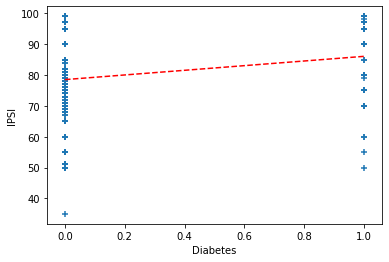

In [107]:
import numpy as np
plt.scatter(df1.Diabetes, df1.IPSI, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Diabetes == 0').IPSI), np.mean(df1.query('Diabetes == 1').IPSI)], 'r--')
plt.ylabel("IPSI")
plt.xlabel("Diabetes")
plt.show()

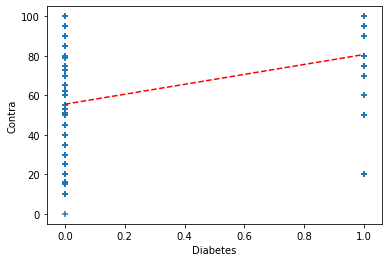

In [108]:
##the higher the level of ipsi the higher the chances of getting diabetes?
##doesnt seem significant though..


plt.scatter(df1.Diabetes, df1.Contra, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Diabetes == 0').Contra), np.mean(df1.query('Diabetes == 1').Contra)], 'r--')
plt.ylabel("Contra")
plt.xlabel("Diabetes")
plt.show()

In [109]:
##the higher the level of contra there is a much higher the chances of getting diabetes?
##seem to be more significant..
##db null is more likely to have diabetes due to high ipsi and contra as per regression model
db_null

Random                 0.0940666
Id                        224257
Indication                   CVA
Diabetes                     NaN
IHD                      yes ihd
Hypertension    yes hypertension
Arrhythmia          yes arrhymia
History               no history
IPSI                        High
Contra               High Contra
label                       Risk
Name: 447, dtype: object

In [110]:
db_null1
##db null1 is less likely to have diabetes due to lower contra and ipsi as per regression model
##use "value" to locate and replace null values for diabetes

Random                   0.39213
Id                        210861
Indication                   A-F
Diabetes                     NaN
IHD                       no ihd
Hypertension    yes hypertension
Arrhythmia           no arrhymia
History               no history
IPSI                      Medium
Contra                Low Contra
label                     NoRisk
Name: 514, dtype: object

In [111]:
df2['Arrhythmia'].isnull().sum()
##history(fixed)
##diabetes(fixed)
##indication(3)
##IHD(0)
##Hypertension(fixed)
##Arrhythmia(0)


0

In [112]:
df2

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# History Fix

In [113]:
df2['Contra'].describe()

count     1520
unique      41
top        100
freq       244
Name: Contra, dtype: object

In [114]:
df1

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,0,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,0,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,0,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,0,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,0,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,0,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,0,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,0,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,0,yes,no,no,no,70.0,45,NoRisk


In [115]:
reg = smf.ols(formula = "Contra ~ Diabetes", data = df1).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Contra   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     54.70
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.31e-13
Time:                        09:29:24   Log-Likelihood:                -7276.8
No. Observations:                1520   AIC:                         1.456e+04
Df Residuals:                    1518   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.5177      0.765     72.590      0.000      54.017      57.018
Diabetes      25.1317      3.398      7.396      0.000      18.466      31.797
==============================================================================
Omnibus:                     1182.161   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.770
Skew:                           0.206   Prob(JB):                     7.96e-23
Kurtosis:                       1.801   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


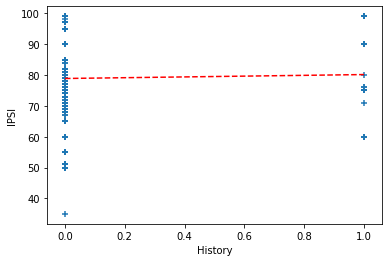

In [116]:
d = df1['History']
c = 0
for item in d:
    if item == "yes":
        d[c] = 1
    elif item == "no":
        d[c] = 0
    else:
        d[c] = 0
    c = c + 1
    
df1['History'] = d


plt.scatter(df1.History, df1.IPSI, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('History == 0').IPSI), np.mean(df1.query('History == 1').IPSI)], 'r--')
plt.ylabel("IPSI")
plt.xlabel("History")
plt.show()

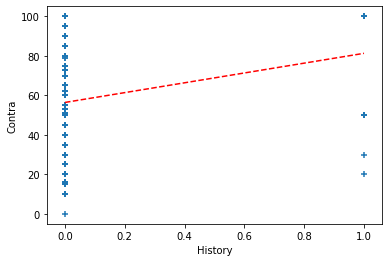

In [117]:
plt.scatter(df1.History, df1.Contra, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('History == 0').Contra), np.mean(df1.query('History == 1').Contra)], 'r--')
plt.ylabel("Contra")
plt.xlabel("History")
plt.show()

##more likely to have history of heart disease if contra s high

In [118]:
h = df2['History']
h

0       no
1       no
2       no
3       no
4       no
        ..
1515    no
1516    no
1517    no
1518    no
1519    no
Name: History, Length: 1520, dtype: object

In [119]:
h = df2['Diabetes'].isnull()
History_nulls = []
c = 0
t =True
for item in h:
    if item == t:
        History_nulls.append(c)
    c = c + 1

In [120]:
History_nulls

[447, 514]

In [121]:
df2.loc[447,:]
##more likely to have a history due to high contra

Random          0.681744
Id                224257
Indication           CVA
Diabetes             NaN
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object

In [122]:
df2.loc[514,:]
##less likely to have history due to low contra

Random          0.39213
Id               210861
Indication          A-F
Diabetes            NaN
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

In [123]:
##do for ass

# Hypertension fix

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


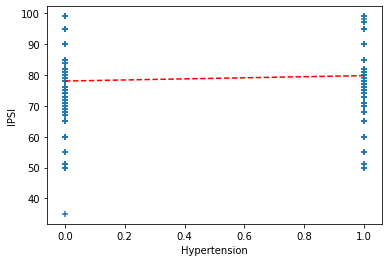

In [124]:
d = df1['Hypertension']
c = 0
for item in d:
    if item == "yes":
        d[c] = 1
    elif item == "no":
        d[c] = 0
    else:
        d[c] = 0
    c = c + 1
    
df1['Hypertension'] = d


plt.scatter(df1.Hypertension, df1.IPSI, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Hypertension == 0').IPSI), np.mean(df1.query('Hypertension == 1').IPSI)], 'r--')
plt.ylabel("IPSI")
plt.xlabel("Hypertension")
plt.show()

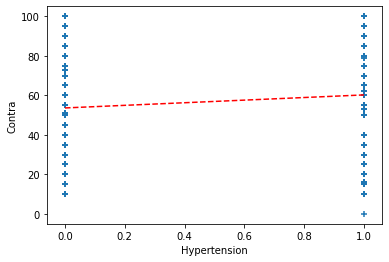

In [125]:
plt.scatter(df1.Hypertension, df1.Contra, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Hypertension == 0').Contra), np.mean(df1.query('Hypertension == 1').Contra)], 'r--')
plt.ylabel("Contra")
plt.xlabel("Hypertension")
plt.show()

##seems to be equally distributed
##associattion

In [126]:
def print_rules(asso_rules):
    for r in asso_rules:
        print(len(r.ordered_statistics))
     
        for outcome in list (r.ordered_statistics):
                x = str(outcome.items_add)
                ##if(x =="frozenset({'yes hypertension'})"):
                print("Rule: "+", ".join(outcome.items_base ), end = " ")
                print("->" + ", ".join(outcome.items_add))
                print("Support: " + str( r. support))
                print("Confidence: "+ str(outcome.confidence))
                print("Lift: "+ str(outcome.lift))
                print(x)
                print("====================================")
               

In [127]:
print_rules(asso_rules)

1
Rule: Medium, yes ->ASx
Support: 0.006578947368421052
Confidence: 0.6666666666666666
Lift: 4.648318042813456
frozenset({'ASx'})
1
Rule: TIA, High ->yes
Support: 0.0125
Confidence: 0.3015873015873016
Lift: 5.953411667697383
frozenset({'yes'})
1
Rule: A-F, High, yes hypertension ->yes
Support: 0.011842105263157895
Confidence: 0.21686746987951808
Lift: 4.2810201846346425
frozenset({'yes'})
1
Rule: High Contra, A-F, yes ->yes arrhymia
Support: 0.009868421052631578
Confidence: 1.0
Lift: 4.6060606060606055
frozenset({'yes arrhymia'})
1
Rule: High Contra, A-F, yes hypertension ->yes
Support: 0.008552631578947369
Confidence: 0.2653061224489796
Lift: 5.2372117678240135
frozenset({'yes'})
1
Rule: High Contra, A-F, yes hypertension ->yes arrhymia
Support: 0.02894736842105263
Confidence: 0.8979591836734693
Lift: 4.136054421768707
frozenset({'yes arrhymia'})
1
Rule: no ihd, A-F, yes ->yes arrhymia
Support: 0.005263157894736842
Confidence: 1.0
Lift: 4.6060606060606055
frozenset({'yes arrhymia'})
1

frozenset({'yes arrhymia'})
1
Rule: ASx, yes hypertension, High, High Contra, no history, yes ihd ->yes arrhymia
Support: 0.007236842105263158
Confidence: 0.9166666666666666
Lift: 4.222222222222222
frozenset({'yes arrhymia'})
1
Rule: no arrhymia, High, yes hypertension, no ihd, no, Low Contra ->ASx
Support: 0.004605263157894736
Confidence: 0.5833333333333333
Lift: 4.0672782874617734
frozenset({'ASx'})
1
Rule: no arrhymia, High, yes hypertension, no ihd, no history, Low Contra ->ASx
Support: 0.004605263157894736
Confidence: 0.5833333333333333
Lift: 4.0672782874617734
frozenset({'ASx'})
1
Rule: no arrhymia, High, yes hypertension, no ihd, no, Medium Contra ->ASx
Support: 0.005263157894736842
Confidence: 0.8888888888888888
Lift: 6.197757390417941
frozenset({'ASx'})
1
Rule: High, yes hypertension, no ihd, no history, no, Medium Contra ->ASx
Support: 0.005263157894736842
Confidence: 0.6153846153846153
Lift: 4.290755116443189
frozenset({'ASx'})
1
Rule: no arrhymia, High, yes hypertension, no

In [128]:
df1

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,0,no,1,no,0,78.0,20,NoRisk
1,0.602437,159284,TIA,0,no,0,no,0,70.0,60,NoRisk
2,0.602437,106066,A-F,0,yes,1,no,0,95.0,40,Risk
3,0.128157,229592,TIA,0,no,1,no,0,90.0,85,Risk
4,0.676862,245829,CVA,0,no,0,no,0,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,0,yes,0,no,0,76.0,60,NoRisk
1516,0.253504,121814,A-F,0,no,1,yes,0,90.0,75,Risk
1517,0.620373,101754,TIA,0,no,1,no,0,75.0,20,NoRisk
1518,0.639342,263836,A-F,0,yes,0,no,0,70.0,45,NoRisk


In [129]:
df1['IPSI'].describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

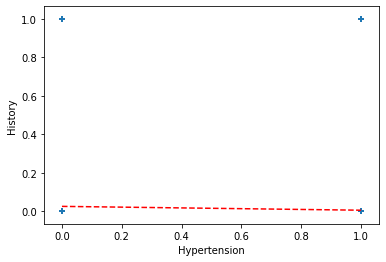

In [130]:
##ipsi and contra dont give a proper overview hence outliers.
plt.scatter(df1.Hypertension, df1.History, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Hypertension == 0').History), np.mean(df1.query('Hypertension == 1').History)], 'r--')
plt.ylabel("History")
plt.xlabel("Hypertension")
plt.show()

# #Arrhythmia vs Hypertension

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


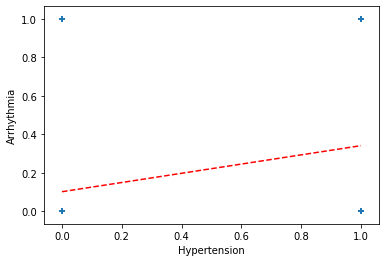

In [131]:
df9 = pd.read_csv(path, encoding = 'utf-8')
d = df9['Arrhythmia']
c = 0
for item in d:
    if item == "yes":
        d[c] = 1
    else:
        d[c] = 0
    c = c + 1
    
df9['Arrhythmia'] = d
df9['Hypertension'] = df1['Hypertension']
plt.scatter(df9.Hypertension, df9.Arrhythmia, marker = "+")
plt.plot([0, 1], [np.mean(df9.query('Hypertension == 0').Arrhythmia), np.mean(df9.query('Hypertension == 1').Arrhythmia)], 'r--')
plt.ylabel("Arrhythmia")
plt.xlabel("Hypertension")
plt.show()

# IHD VS Hypertension

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


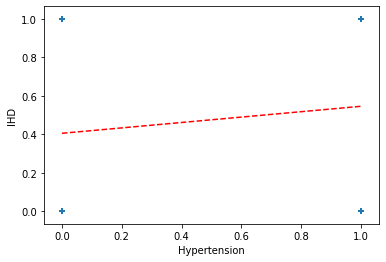

In [132]:
df9 = pd.read_csv(path, encoding = 'utf-8')
d = df9['IHD']
c = 0
for item in d:
    if item == "yes":
        d[c] = 1
    else:
        d[c] = 0
    c = c + 1
    
df9['IHD'] = d
df9['Hypertension'] = df1['Hypertension']
plt.scatter(df9.Hypertension, df9.IHD, marker = "+")
plt.plot([0, 1], [np.mean(df9.query('Hypertension == 0').IHD), np.mean(df9.query('Hypertension == 1').IHD)], 'r--')
plt.ylabel("IHD")
plt.xlabel("Hypertension")
plt.show()

# A-F VS Hypertension

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


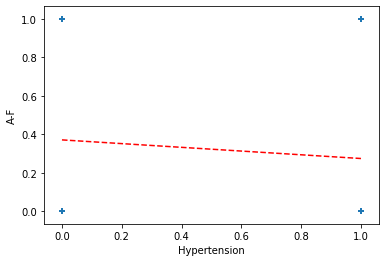

In [133]:
##A-F
##TIA
##CVA
##ASx
d = df1['Indication']
c = 0
for item in d:
    if item == "A-F":
        d[c] = 1
    else:
        d[c] = 0
    c = c + 1
    
df1['Indication'] = d

plt.scatter(df1.Hypertension, df1.Indication, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Hypertension == 0').Indication), np.mean(df1.query('Hypertension == 1').Indication)], 'r--')
plt.ylabel("A-F")
plt.xlabel("Hypertension")
plt.show()

# TIA VS Hypertension

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


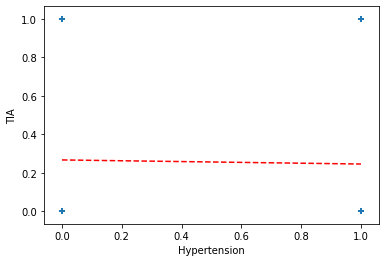

In [134]:
df4 = pd.read_csv(path, encoding = 'utf-8')
d = df4['Indication']
c = 0
for item in d:
    if item == "TIA":
        d[c] = 1
    else:
        d[c] = 0
    c = c + 1
    
df4['Indication'] = d
df4['Hypertension'] = df1['Hypertension']
plt.scatter(df4.Hypertension, df4.Indication, marker = "+")
plt.plot([0, 1], [np.mean(df4.query('Hypertension == 0').Indication), np.mean(df4.query('Hypertension == 1').Indication)], 'r--')
plt.ylabel("TIA")
plt.xlabel("Hypertension")
plt.show()

# CVA VS Hypertension

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


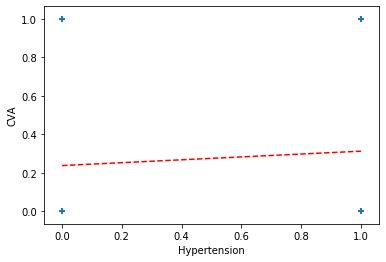

In [135]:
df5 = pd.read_csv(path, encoding = 'utf-8')
d = df5['Indication']
c = 0
for item in d:
    if item == "CVA":
        d[c] = 1
    else:
        d[c] = 0
    c = c + 1
    
df5['Indication'] = d
df5['Hypertension'] = df1['Hypertension']
plt.scatter(df4.Hypertension, df4.Indication, marker = "+")
plt.plot([0, 1], [np.mean(df5.query('Hypertension == 0').Indication), np.mean(df5.query('Hypertension == 1').Indication)], 'r--')
plt.ylabel("CVA")
plt.xlabel("Hypertension")
plt.show()

# ASx VS Hypertension

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


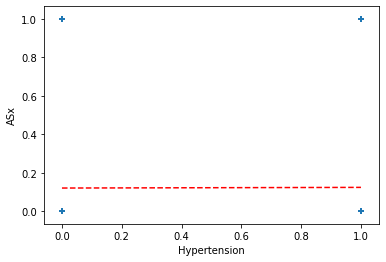

In [136]:
df6 = pd.read_csv(path, encoding = 'utf-8')
d = df6['Indication']
c = 0
for item in d:
    if item == "ASx":
        d[c] = 1
    else:
        d[c] = 0
    c = c + 1
    
df6['Indication'] = d
df6['Hypertension'] = df1['Hypertension']
plt.scatter(df6.Hypertension, df6.Indication, marker = "+")
plt.plot([0, 1], [np.mean(df6.query('Hypertension == 0').Indication), np.mean(df6.query('Hypertension == 1').Indication)], 'r--')
plt.ylabel("ASx")
plt.xlabel("Hypertension")
plt.show()

In [137]:
##affected slightly by cva, having af lowers chances of hypertension,a higher contra increases chances of having hyertension
##having ihd and arrhythmia significantly increases chances of hypertension

df2 = pd.read_csv(path, encoding = 'utf-8')
db2 = df2['Hypertension']
x = db2.isnull().sum()
y = db2.isnull()

c = 0
t = True
value = []
for item in y:
    if(item == t):
      value.append(c)
    c = c + 1

print(value)


[201, 590, 983]


In [138]:
db_null = df2.loc[201,:]
db_null1 = df2.loc[590,:]
db_null2 = df2.loc[983,:]
db_null

##likely to have Hypertension due to arrhythmia and high contra

Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object

In [139]:
db_null1
##less likely for Hypertension 

Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object

In [140]:
db_null2
##less likely for Hypertension

Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object

# Contra and ipsi impute

In [141]:

df2 = pd.read_csv(path, encoding = 'utf-8')
x = df2['IPSI'].fillna(df2['IPSI'].mean())

In [142]:
x.isnull().sum()

0

In [143]:
df2['IPSI'].isnull().sum()

4

In [144]:
x.describe()

count    1520.000000
mean       78.872032
std        10.148962
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [145]:
df2['IPSI'].describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [146]:
df2['IPSI'] = x

In [147]:
df2['IPSI'].isnull().sum()

0

In [148]:
F = None
counter1 = 0
contra = df2['Contra']
for item in contra:
    x = df2.loc[counter1,:]
    if(x.values[9]== " "):
        x.values[9] = 0
    else:
        x.values[9]=float(x.values[9])
        df2.loc[counter1,:] = x
    counter1 = counter1 + 1
    

In [149]:
c = df2['Contra']

In [150]:
c.describe()

count     1520.0
unique      26.0
top        100.0
freq       283.0
Name: Contra, dtype: float64